# Prediksi Cuaca

## Data preparation

### Import library

In [1]:
#Import library yang dibutuhkan 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

### Menampilkan data

In [2]:
#Membaca datafile kita dan mengambil beberapa kolom yg dibutuhkan saja
df = pd.read_csv('train_dataset.csv')

In [3]:
df.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,30.3,21.1,61.741207,87.262192,26.629430,23.075077,4.263528,21.399026,0.297776,0.616711,...,0.000000,0.000000,0.000479,0.000000,37.5776,126.938,75.0924,1.7678,5131.667480,26.4
1,29.3,20.9,85.943954,97.694801,25.380395,23.275475,8.697955,53.165713,0.901123,0.867350,...,2.642577,0.261794,0.288428,2.315489,37.5507,126.988,132.1180,0.5931,5918.901367,25.6
2,29.5,22.2,32.008099,69.966370,31.991670,21.475995,10.461500,37.582673,0.012838,0.086090,...,0.000000,0.000000,0.000000,0.000000,37.5507,126.937,30.0464,0.8552,5222.419434,30.6
3,32.6,21.2,60.070614,91.244827,27.043616,23.338373,15.686361,95.842065,0.622580,0.388476,...,0.285723,0.335796,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5558.630371,27.2
4,33.0,27.6,62.508846,86.983963,31.529577,27.307177,6.493082,49.887497,0.438076,0.458994,...,0.000000,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5635.460449,32.8


In [4]:
df.tail()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
6584,31.4,25.9,70.250511,90.605248,29.778636,25.518494,7.424166,35.116337,0.569784,0.772786,...,0.037094,1.200366,0.0,0.0,37.5776,127.083,59.8324,2.6865,5310.041992,33.8
6585,32.8,20.3,42.189671,69.954666,28.652535,20.329686,12.924104,141.607279,0.116489,0.137232,...,0.000000,0.000000,0.0,0.0,37.4697,126.995,82.2912,2.2579,5712.382324,27.4
6586,31.0,24.7,52.810146,86.206841,32.837630,25.710858,6.580249,97.316694,0.025348,0.100569,...,0.000000,0.000000,0.0,0.0,37.4697,126.995,82.2912,2.2579,5241.705566,33.0
6587,27.0,24.0,73.445656,93.612633,27.240955,24.875103,5.304328,29.945006,0.576503,0.678209,...,0.119012,0.565905,0.0,0.0,37.5372,127.085,28.7000,0.6233,5694.289551,27.0
6588,28.8,23.0,37.213074,94.007675,32.002693,23.374335,5.745168,56.699324,0.221865,0.116836,...,0.000000,0.000000,0.0,0.0,37.6046,127.032,44.7624,0.5141,4731.177734,32.3


### Menampilkan informasi data

In [5]:
df.shape

(6589, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      6528 non-null   float64
 1   Present_Tmin      6528 non-null   float64
 2   LDAPS_RHmin       6524 non-null   float64
 3   LDAPS_RHmax       6524 non-null   float64
 4   LDAPS_Tmax_lapse  6524 non-null   float64
 5   LDAPS_Tmin_lapse  6524 non-null   float64
 6   LDAPS_WS          6524 non-null   float64
 7   LDAPS_LH          6524 non-null   float64
 8   LDAPS_CC1         6524 non-null   float64
 9   LDAPS_CC2         6524 non-null   float64
 10  LDAPS_CC3         6524 non-null   float64
 11  LDAPS_CC4         6524 non-null   float64
 12  LDAPS_PPT1        6524 non-null   float64
 13  LDAPS_PPT2        6524 non-null   float64
 14  LDAPS_PPT3        6524 non-null   float64
 15  LDAPS_PPT4        6524 non-null   float64
 16  lat               6589 non-null   float64


Arti dari setiap variabel :
1. T Temperature present- suhu saat ini
2. RH Relative Humidity - keleembapan relatif
3. T Temperature lapse - selang suhu
4. WS
5. LH 
6. CC CLOUD COVER - 1: clear sky>cerah, 2: scattered clouds>sebaran awan, 3: broken clouds>awan pecah, 4:overcast>mendung 
7. PPT 
8. lat latitude
9. lon longitude
10. DEM
11. lereng
12. radiasi matahari
13. suhu berikutnya

In [7]:
df.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
count,6528.000000,6528.000000,6524.000000,6524.000000,6524.000000,6524.000000,6524.000000,6524.000000,6524.000000,6524.000000,...,6524.000000,6524.000000,6524.000000,6524.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6567.000000
mean,29.767203,23.217862,56.733485,88.375947,29.618749,23.514294,7.078863,62.607915,0.368274,0.356035,...,0.578082,0.479413,0.280178,0.273615,37.544970,126.991331,62.042712,1.254981,5342.443957,30.284102
std,2.983094,2.429038,14.643501,7.201419,2.949113,2.345499,2.151549,33.846639,0.263172,0.258348,...,1.919926,1.745113,1.169598,1.230588,0.050402,0.079562,54.485681,1.368080,429.247389,3.132548
min,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000
25%,27.800000,21.600000,45.957097,84.224436,27.662062,22.100277,5.681878,37.253107,0.145684,0.138993,...,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,5004.824219,28.200000
50%,29.900000,23.400000,55.017689,89.798084,29.697722,23.763636,6.540526,56.871052,0.314975,0.313254,...,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5435.520020,30.500000
75%,32.000000,24.900000,67.205536,93.771591,31.729855,25.147837,7.990957,84.235666,0.574132,0.557710,...,0.049101,0.016580,0.007753,0.000000,37.577600,127.042000,59.832400,1.767800,5730.027832,32.700000
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,...,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000


### Categorical

In [8]:
# Melihat data kategorikal

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)
df[categorical].head()

There are 0 categorical variables

The categorical variables are : []


""
0
1
2
3
4


### Numerical 

In [9]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)
df[numerical].head()

There are 22 numerical variables

The numerical variables are : ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax']


,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,30.3,21.1,61.741207,87.262192,26.629430,23.075077,4.263528,21.399026,0.297776,0.616711,...,0.000000,0.000000,0.000479,0.000000,37.5776,126.938,75.0924,1.7678,5131.667480,26.4
1,29.3,20.9,85.943954,97.694801,25.380395,23.275475,8.697955,53.165713,0.901123,0.867350,...,2.642577,0.261794,0.288428,2.315489,37.5507,126.988,132.1180,0.5931,5918.901367,25.6
2,29.5,22.2,32.008099,69.966370,31.991670,21.475995,10.461500,37.582673,0.012838,0.086090,...,0.000000,0.000000,0.000000,0.000000,37.5507,126.937,30.0464,0.8552,5222.419434,30.6
3,32.6,21.2,60.070614,91.244827,27.043616,23.338373,15.686361,95.842065,0.622580,0.388476,...,0.285723,0.335796,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5558.630371,27.2
4,33.0,27.6,62.508846,86.983963,31.529577,27.307177,6.493082,49.887497,0.438076,0.458994,...,0.000000,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5635.460449,32.8


### Unique values

In [10]:
unique_values = df.nunique()
unique_values

Present_Tmax         167
Present_Tmin         153
LDAPS_RHmin         6520
LDAPS_RHmax         6513
LDAPS_Tmax_lapse    6522
LDAPS_Tmin_lapse    6523
LDAPS_WS            6523
LDAPS_LH            6523
LDAPS_CC1           6430
LDAPS_CC2           6442
LDAPS_CC3           6456
LDAPS_CC4           6398
LDAPS_PPT1          2368
LDAPS_PPT2          2129
LDAPS_PPT3          1988
LDAPS_PPT4          1619
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1571
Next_Tmax            180
dtype: int64

Text(0.5, 0, 'Variabel')

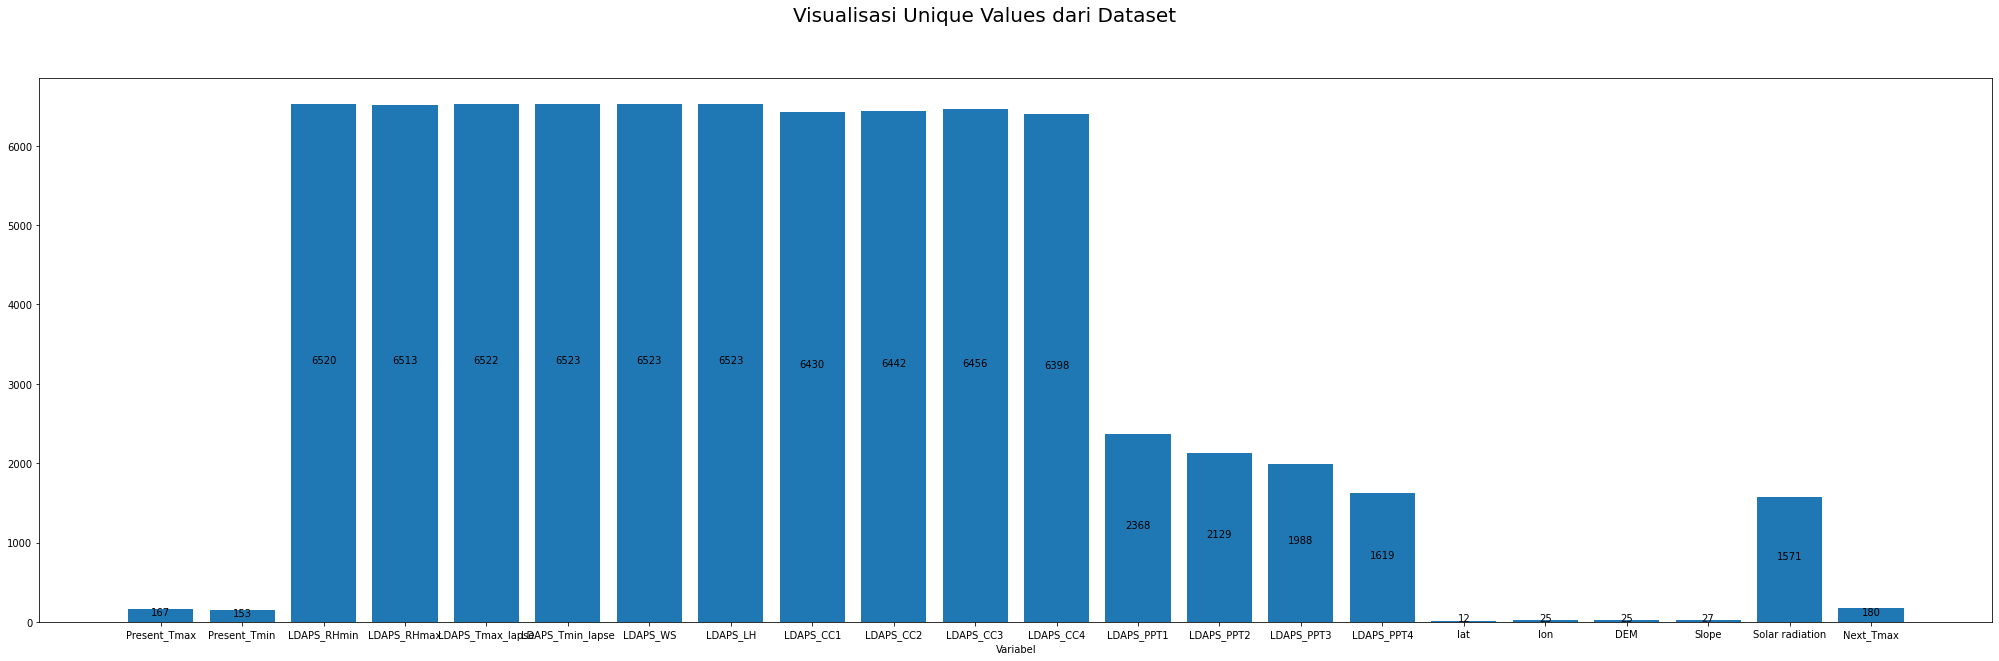

In [11]:
#Visualisasi Unique Values
fig = plt.figure(figsize=(35,10))
plt.bar(df.columns, unique_values)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')
addlabels(df.columns, unique_values)

fig.suptitle('Visualisasi Unique Values dari Dataset', fontsize=20)
plt.xlabel('Variabel', fontsize=10)

### Missing value

In [12]:
missing_value = df.isnull().sum()
missing_value

Present_Tmax        61
Present_Tmin        61
LDAPS_RHmin         65
LDAPS_RHmax         65
LDAPS_Tmax_lapse    65
LDAPS_Tmin_lapse    65
LDAPS_WS            65
LDAPS_LH            65
LDAPS_CC1           65
LDAPS_CC2           65
LDAPS_CC3           65
LDAPS_CC4           65
LDAPS_PPT1          65
LDAPS_PPT2          65
LDAPS_PPT3          65
LDAPS_PPT4          65
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           22
dtype: int64

Text(0.5, 0, 'Variabel')

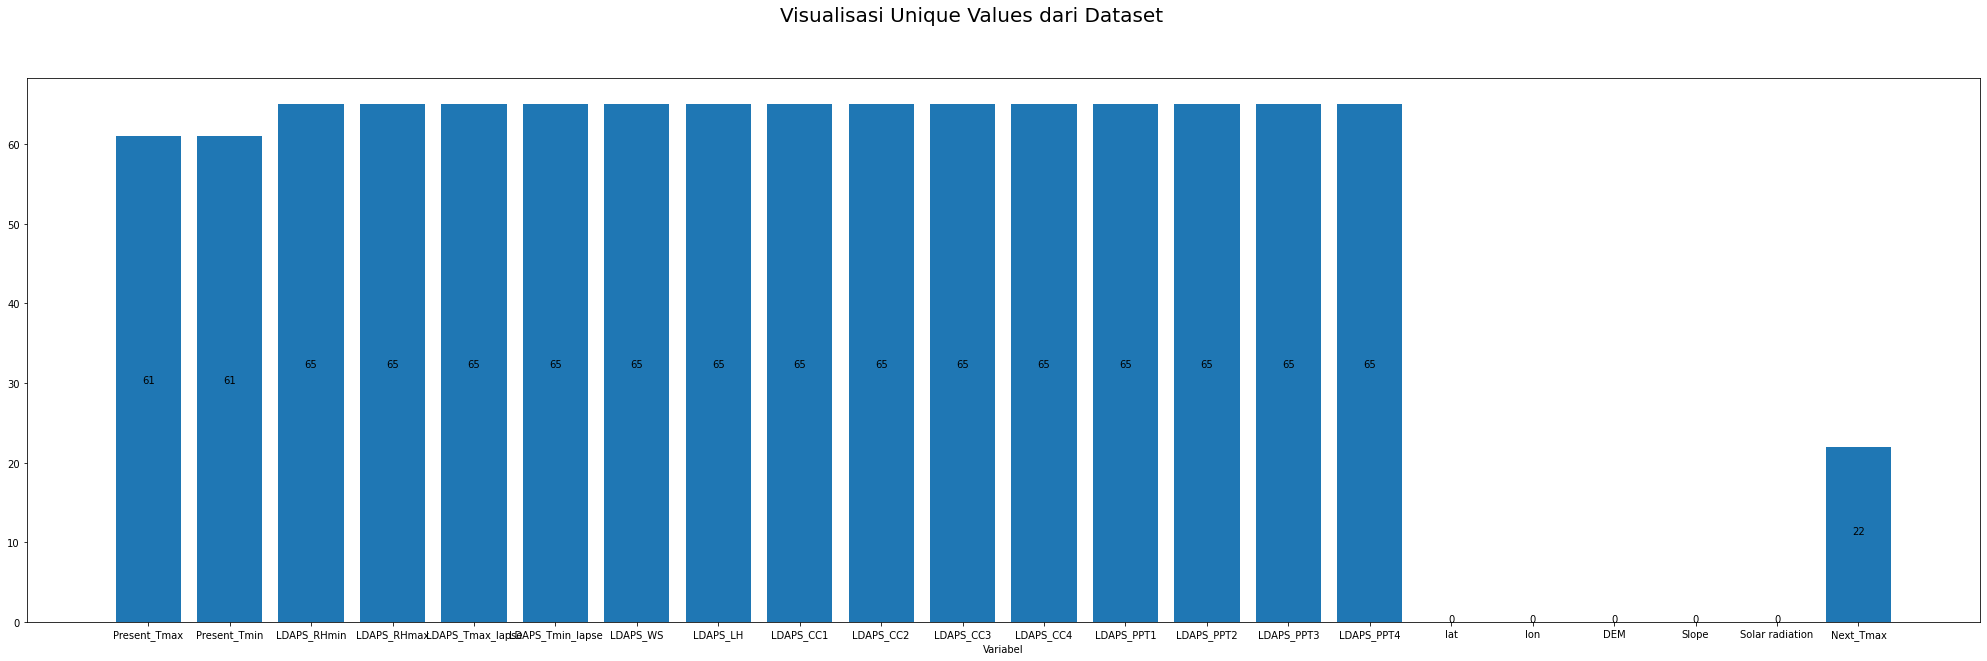

In [13]:
#Visualisasi Unique Values
fig = plt.figure(figsize=(35,10))
plt.bar(df.columns, missing_value)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')
addlabels(df.columns, missing_value)

fig.suptitle('Visualisasi Unique Values dari Dataset', fontsize=20)
plt.xlabel('Variabel', fontsize=10)

### Outliers

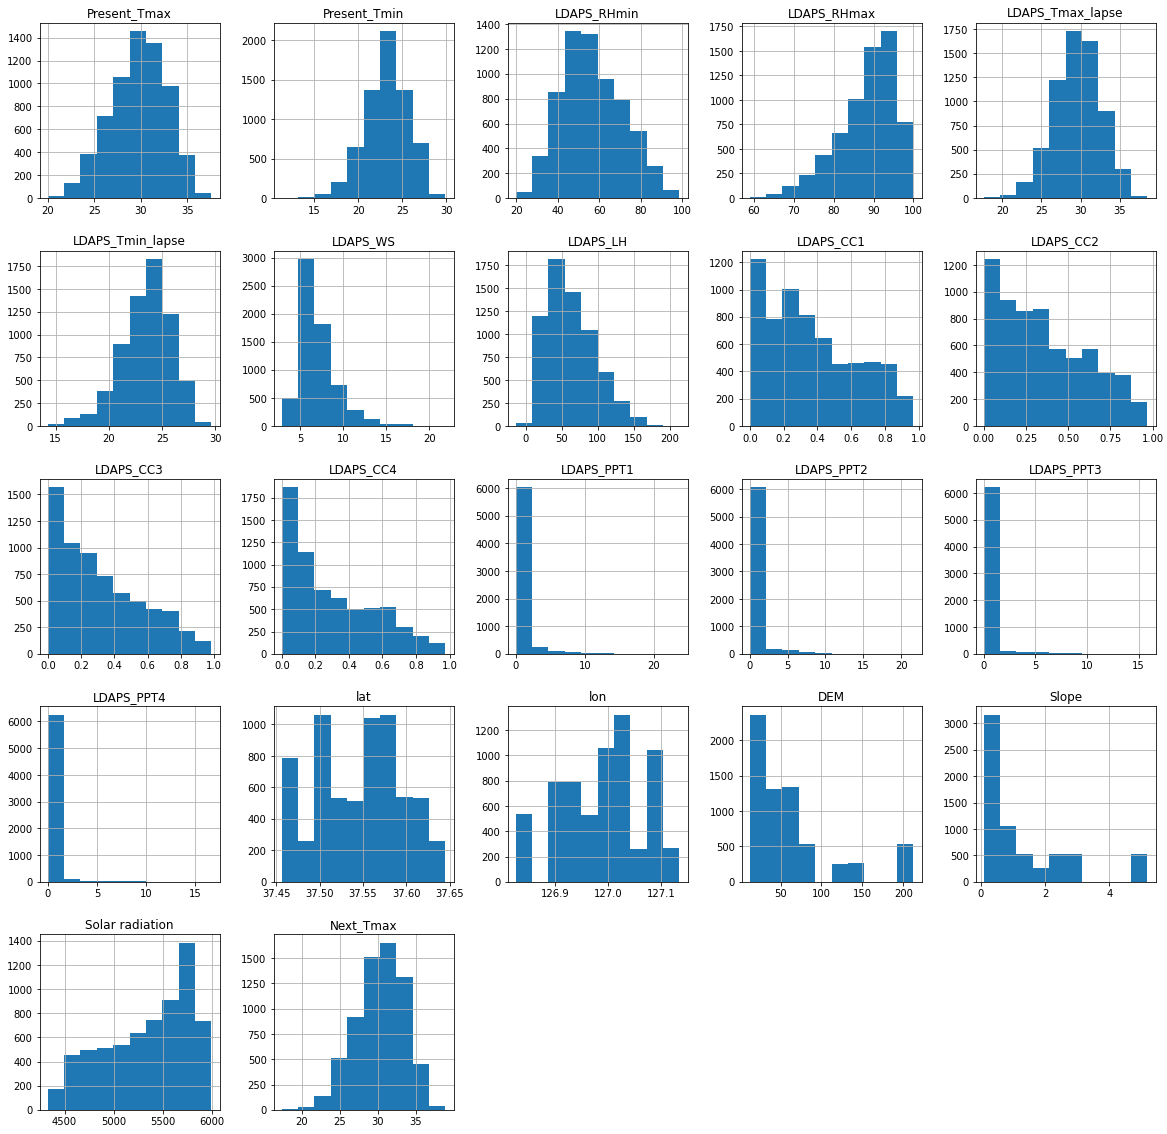

In [14]:
#Menampilkan histogram data 
df.hist(bins=10, figsize=(20,20))

plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      6528 non-null   float64
 1   Present_Tmin      6528 non-null   float64
 2   LDAPS_RHmin       6524 non-null   float64
 3   LDAPS_RHmax       6524 non-null   float64
 4   LDAPS_Tmax_lapse  6524 non-null   float64
 5   LDAPS_Tmin_lapse  6524 non-null   float64
 6   LDAPS_WS          6524 non-null   float64
 7   LDAPS_LH          6524 non-null   float64
 8   LDAPS_CC1         6524 non-null   float64
 9   LDAPS_CC2         6524 non-null   float64
 10  LDAPS_CC3         6524 non-null   float64
 11  LDAPS_CC4         6524 non-null   float64
 12  LDAPS_PPT1        6524 non-null   float64
 13  LDAPS_PPT2        6524 non-null   float64
 14  LDAPS_PPT3        6524 non-null   float64
 15  LDAPS_PPT4        6524 non-null   float64
 16  lat               6589 non-null   float64


Text(0, 0.5, 'Next_Tmax')

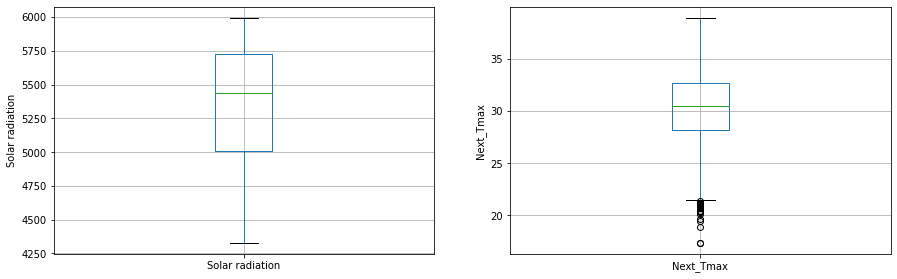

In [16]:
#Menampilkan outliers dalam bentuk grafik
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Solar radiation')
fig.set_title('')
fig.set_ylabel('Solar radiation')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='Next_Tmax')
fig.set_title('')
fig.set_ylabel('Next_Tmax')


Text(0, 0.5, 'LDAPS_CC4')

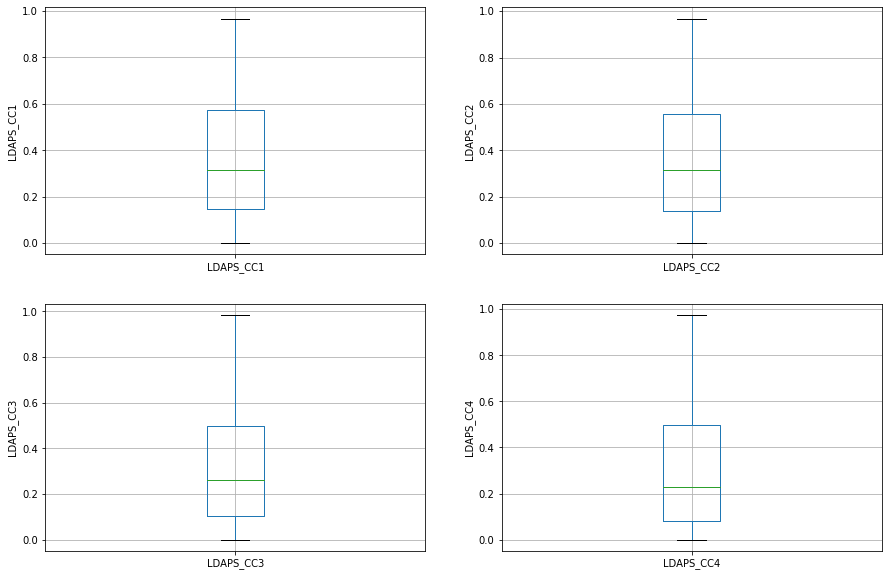

In [17]:
#Menampilkan outliers dalam bentuk grafik
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='LDAPS_CC1')
fig.set_title('')
fig.set_ylabel('LDAPS_CC1')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='LDAPS_CC2')
fig.set_title('')
fig.set_ylabel('LDAPS_CC2')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='LDAPS_CC3')
fig.set_title('')
fig.set_ylabel('LDAPS_CC3')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='LDAPS_CC4')
fig.set_title('')
fig.set_ylabel('LDAPS_CC4')

Text(0, 0.5, 'LDAPS_LH')

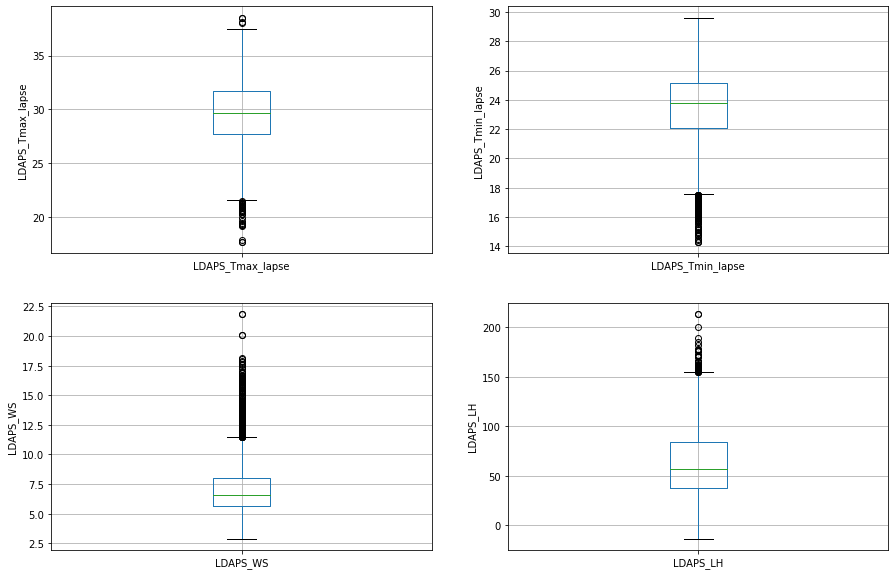

In [18]:
#Menampilkan outliers dalam bentuk grafik
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='LDAPS_Tmax_lapse')
fig.set_title('')
fig.set_ylabel('LDAPS_Tmax_lapse')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='LDAPS_Tmin_lapse')
fig.set_title('')
fig.set_ylabel('LDAPS_Tmin_lapse')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='LDAPS_WS')
fig.set_title('')
fig.set_ylabel('LDAPS_WS')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='LDAPS_LH')
fig.set_title('')
fig.set_ylabel('LDAPS_LH')

Text(0, 0.5, 'LDAPS_RHmax')

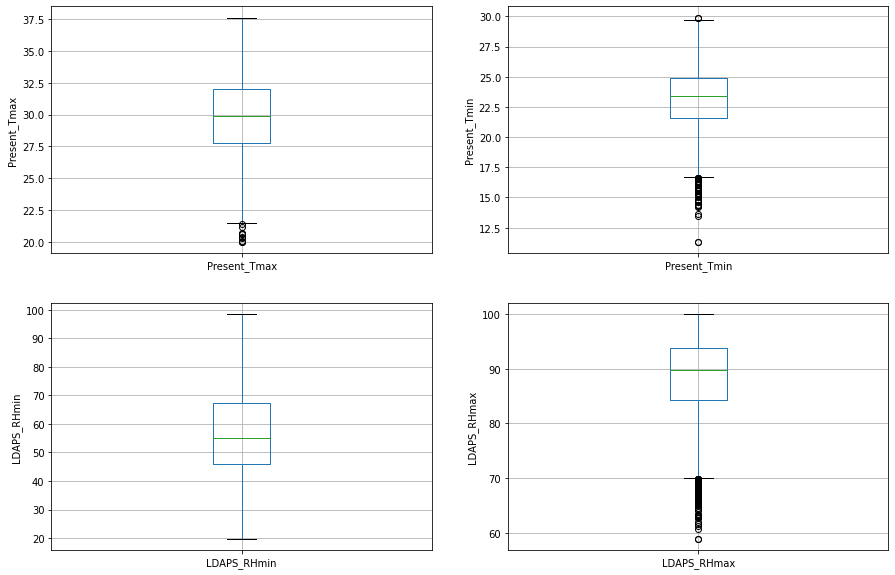

In [19]:
#Menampilkan outliers dalam bentuk grafik
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Present_Tmax')
fig.set_title('')
fig.set_ylabel('Present_Tmax')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='Present_Tmin')
fig.set_title('')
fig.set_ylabel('Present_Tmin')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='LDAPS_RHmin')
fig.set_title('')
fig.set_ylabel('LDAPS_RHmin')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='LDAPS_RHmax')
fig.set_title('')
fig.set_ylabel('LDAPS_RHmax')

Text(0, 0.5, 'LDAPS_PPT4')

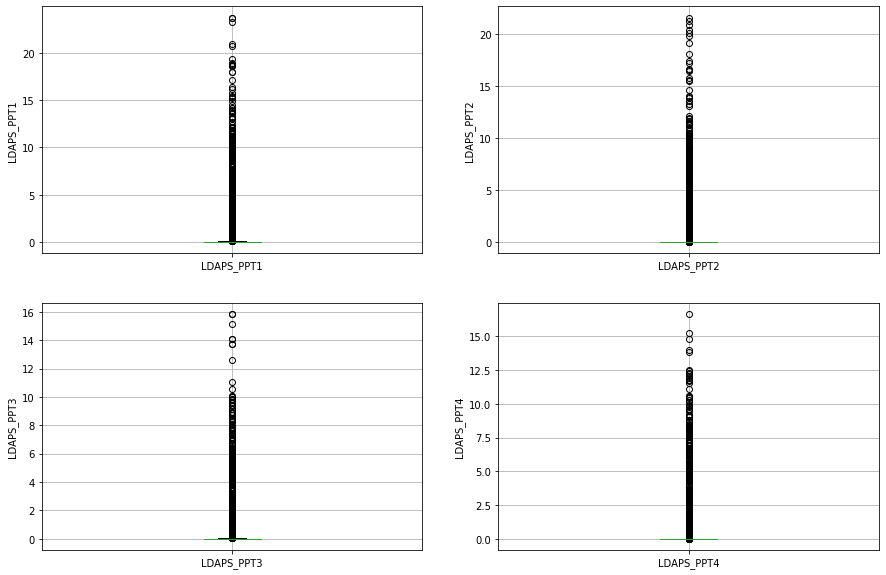

In [20]:
#Menampilkan outliers dalam bentuk grafik
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='LDAPS_PPT1')
fig.set_title('')
fig.set_ylabel('LDAPS_PPT1')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='LDAPS_PPT2')
fig.set_title('')
fig.set_ylabel('LDAPS_PPT2')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='LDAPS_PPT3')
fig.set_title('')
fig.set_ylabel('LDAPS_PPT3')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='LDAPS_PPT4')
fig.set_title('')
fig.set_ylabel('LDAPS_PPT4')

Text(0, 0.5, 'lon')

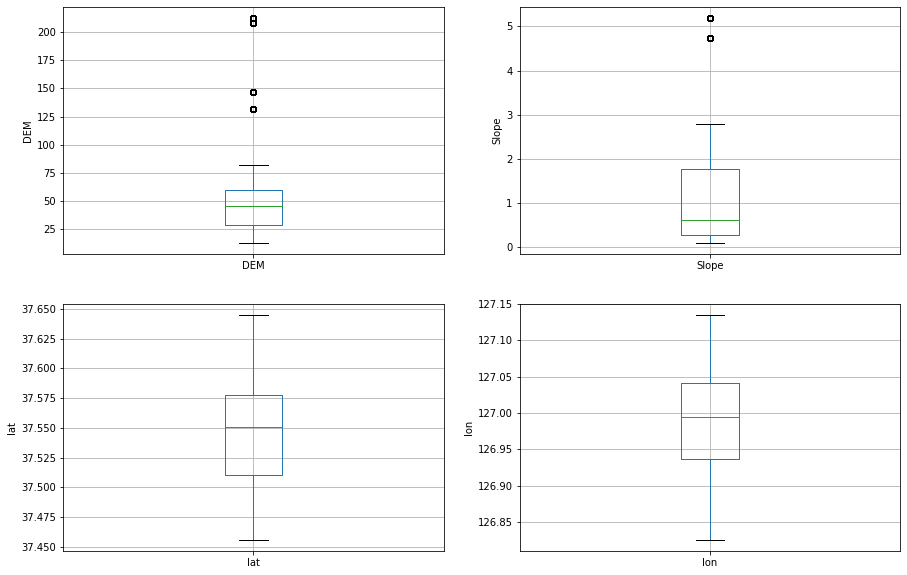

In [21]:
#Menampilkan outliers dalam bentuk grafik
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='DEM')
fig.set_title('')
fig.set_ylabel('DEM')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='Slope')
fig.set_title('')
fig.set_ylabel('Slope')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='lat')
fig.set_title('')
fig.set_ylabel('lat')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='lon')
fig.set_title('')
fig.set_ylabel('lon')

### Correlation

In [22]:
#Menampilkan kolerasi dari semua kolom data
korelasi=df.corr()
korelasi

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
Present_Tmax,1.000000,0.617641,-0.204789,-0.298904,0.575317,0.628937,-0.116963,0.142356,-0.313095,-0.216844,...,-0.103633,-0.095368,-0.119521,-0.102367,-0.050210,0.013300,-0.190972,-0.100495,-0.027761,0.613971
Present_Tmin,0.617641,1.000000,0.127429,-0.011390,0.474117,0.775355,-0.039562,-0.003559,0.088833,0.093078,...,0.118529,0.075146,-0.041609,-0.067789,-0.083904,-0.038706,-0.255770,-0.143182,0.051220,0.480871
LDAPS_RHmin,-0.204789,0.127429,1.000000,0.578957,-0.560126,0.092447,0.280282,-0.076371,0.612246,0.746088,...,0.264141,0.392678,0.241015,0.165949,0.087334,-0.073605,0.102449,0.118823,0.249264,-0.437581
LDAPS_RHmax,-0.298904,-0.011390,0.578957,1.000000,-0.371869,-0.111858,0.124605,0.236035,0.433980,0.391205,...,0.263955,0.227462,0.137192,0.120064,0.198755,0.025463,0.179357,0.220017,0.149501,-0.281169
LDAPS_Tmax_lapse,0.575317,0.474117,-0.560126,-0.371869,1.000000,0.656094,-0.302015,0.053319,-0.434856,-0.520931,...,-0.108394,-0.240155,-0.189093,-0.157402,-0.039799,0.095616,-0.185072,-0.159213,0.047155,0.836222
LDAPS_Tmin_lapse,0.628937,0.775355,0.092447,-0.111858,0.656094,1.000000,-0.127486,-0.130782,0.014577,0.049656,...,0.043058,0.003927,-0.087622,-0.094439,-0.096442,-0.016649,-0.199866,-0.183053,0.160584,0.595602
LDAPS_WS,-0.116963,-0.039562,0.280282,0.124605,-0.302015,-0.127486,1.000000,0.008196,0.283050,0.254903,...,0.140473,0.182045,0.163392,0.138730,0.030184,-0.063434,0.188031,0.160826,0.118097,-0.341725
LDAPS_LH,0.142356,-0.003559,-0.076371,0.236035,0.053319,-0.130782,0.008196,1.000000,-0.152788,-0.271878,...,-0.018751,-0.082045,0.015613,0.019383,0.141390,0.018711,0.053179,0.085917,-0.052418,0.164475
LDAPS_CC1,-0.313095,0.088833,0.612246,0.433980,-0.434856,0.014577,0.283050,-0.152788,1.000000,0.780367,...,0.445859,0.390564,0.163294,0.080691,-0.011685,-0.003180,-0.016242,-0.028106,0.218967,-0.452924
LDAPS_CC2,-0.216844,0.093078,0.746088,0.391205,-0.520931,0.049656,0.254903,-0.271878,0.780367,1.000000,...,0.309335,0.479072,0.236709,0.153602,-0.000619,0.002977,-0.016332,-0.027057,0.173158,-0.491555


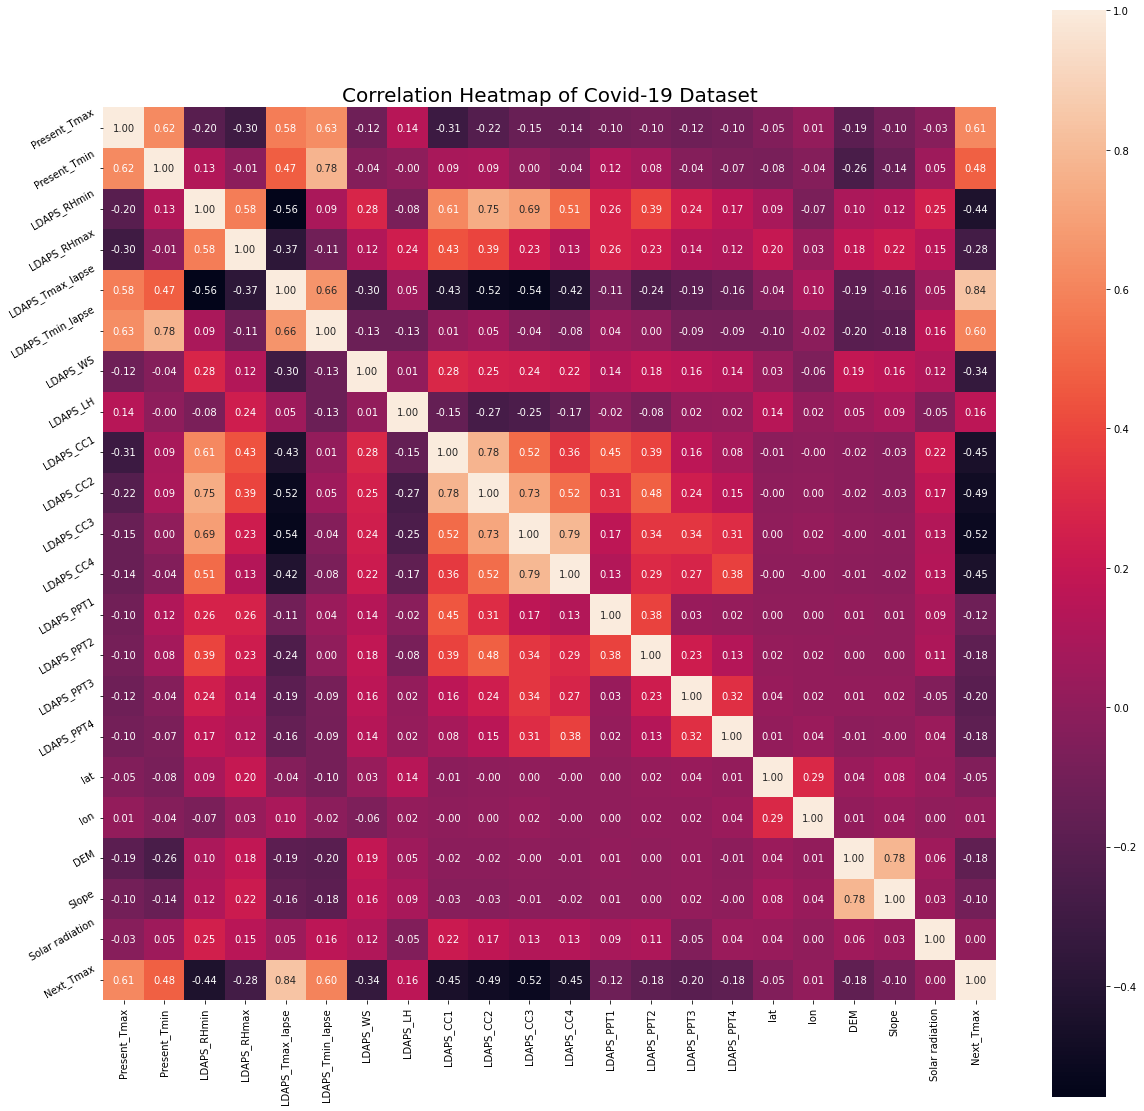

In [23]:
#Menampilkan visualisasi kolerasi data
correlation = df.corr()
plt.figure(figsize=(20,20))
plt.title('Correlation Heatmap of Covid-19 Dataset', fontsize=20)
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()
#sns.heatmap(kolerasi);

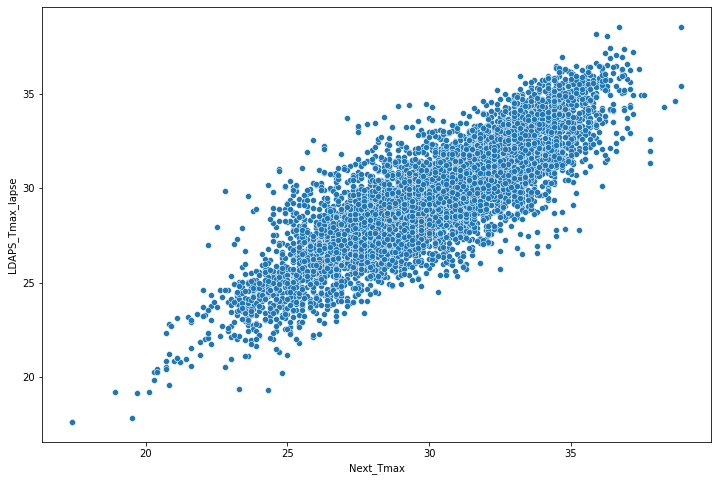

In [24]:
plt.figure(figsize = (12,8))
sns.scatterplot(y = df['LDAPS_Tmax_lapse'],  x = df['Next_Tmax'])
plt.show()

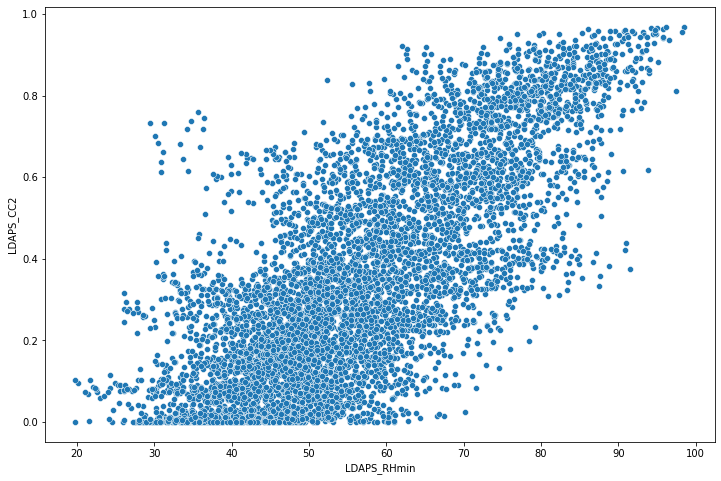

In [25]:
plt.figure(figsize = (12,8))
sns.scatterplot(y = df['LDAPS_CC2'],  x = df['LDAPS_RHmin'])
plt.show()

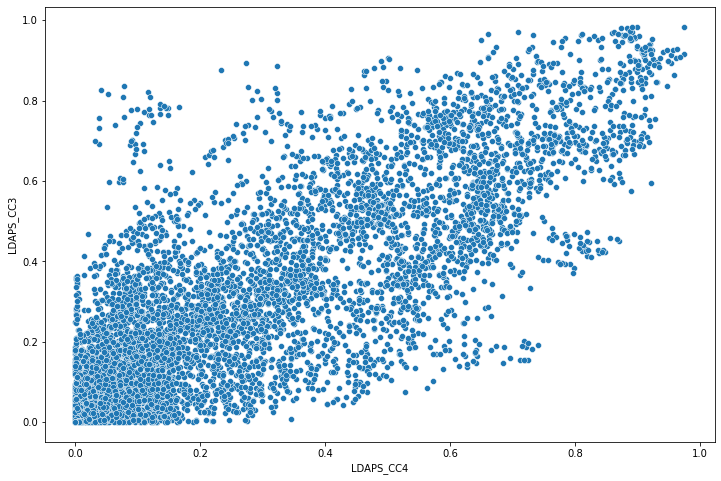

In [26]:
plt.figure(figsize = (12,8))
sns.scatterplot(y = df['LDAPS_CC3'],  x = df['LDAPS_CC4'])
plt.show()

## Data preprocessing

### Missing value

In [27]:
df['Present_Tmax'] = df['Present_Tmax'].fillna(df['Present_Tmax'].mean())
df['Present_Tmin'] = df['Present_Tmin'].fillna(df['Present_Tmin'].mean())
df['LDAPS_RHmin'] = df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())
df['LDAPS_RHmax'] = df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())
df['LDAPS_Tmax_lapse'] = df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())
df['LDAPS_Tmin_lapse'] = df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())
df['LDAPS_WS'] = df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())
df['LDAPS_LH'] = df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())
df['LDAPS_CC1'] = df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())
df['LDAPS_CC2'] = df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())
df['LDAPS_CC3'] = df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())
df['LDAPS_CC4'] = df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())
df['LDAPS_PPT1'] = df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())
df['LDAPS_PPT2'] = df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())
df['LDAPS_PPT3'] = df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())
df['LDAPS_PPT4'] = df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())
df['Next_Tmax'] = df['Next_Tmax'].fillna(df['Next_Tmax'].mean())

In [28]:
df.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
dtype: int64

### Handle outlier

In [29]:
df.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,30.3,21.1,61.741207,87.262192,26.629430,23.075077,4.263528,21.399026,0.297776,0.616711,...,0.000000,0.000000,0.000479,0.000000,37.5776,126.938,75.0924,1.7678,5131.667480,26.4
1,29.3,20.9,85.943954,97.694801,25.380395,23.275475,8.697955,53.165713,0.901123,0.867350,...,2.642577,0.261794,0.288428,2.315489,37.5507,126.988,132.1180,0.5931,5918.901367,25.6
2,29.5,22.2,32.008099,69.966370,31.991670,21.475995,10.461500,37.582673,0.012838,0.086090,...,0.000000,0.000000,0.000000,0.000000,37.5507,126.937,30.0464,0.8552,5222.419434,30.6
3,32.6,21.2,60.070614,91.244827,27.043616,23.338373,15.686361,95.842065,0.622580,0.388476,...,0.285723,0.335796,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5558.630371,27.2
4,33.0,27.6,62.508846,86.983963,31.529577,27.307177,6.493082,49.887497,0.438076,0.458994,...,0.000000,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5635.460449,32.8


In [30]:
#Mengatasi Outlier
features_with_outliers = ['Present_Tmax','Present_Tmin', 'LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','DEM', 'Slope','Next_Tmax','LDAPS_WS','LDAPS_WS','LDAPS_RHmax']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature]=lower_limit
    df.loc[df[feature]>upper_limit,feature]=upper_limit

## Train Test Split

### Splitting

In [31]:
#Membagi variabel independen dan dependen menggunakan x dan y
x = df.drop(columns='Next_Tmax')
y = df['Next_Tmax']

### MinMax Scalling

In [32]:
#Melakukan standarisasi 
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x)
x_train_minmax

array([[0.54658385, 0.328125  , 0.53278934, ..., 0.66611867, 0.42649291,
        0.48224047],
       [0.48447205, 0.3125    , 0.84020362, ..., 1.        , 0.12637094,
        0.95551538],
       [0.49689441, 0.4140625 , 0.15513047, ..., 0.18772528, 0.1933344 ,
        0.53679938],
       ...,
       [0.59006211, 0.609375  , 0.41935033, ..., 0.7425707 , 0.55170767,
        0.54839395],
       [0.34161491, 0.5546875 , 0.68145488, ..., 0.17342637, 0.13408669,
        0.82048164],
       [0.45341615, 0.4765625 , 0.22124212, ..., 0.34401079, 0.10618738,
        0.24147117]])

In [33]:
df.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,30.3,21.1,61.741207,87.262192,26.629430,23.075077,4.263528,21.399026,0.297776,0.616711,...,0.000000,0.000000,0.000479,0.000000,37.5776,126.938,75.0924,1.7678,5131.667480,26.4
1,29.3,20.9,85.943954,97.694801,25.380395,23.275475,8.697955,53.165713,0.901123,0.867350,...,2.642577,0.261794,0.288428,2.315489,37.5507,126.988,106.5310,0.5931,5918.901367,25.6
2,29.5,22.2,32.008099,70.255321,31.991670,21.475995,10.461500,37.582673,0.012838,0.086090,...,0.000000,0.000000,0.000000,0.000000,37.5507,126.937,30.0464,0.8552,5222.419434,30.6
3,32.6,21.2,60.070614,91.244827,27.043616,23.338373,11.393358,95.842065,0.622580,0.388476,...,0.285723,0.335796,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5558.630371,27.2
4,33.0,27.6,62.508846,86.983963,31.529577,27.307177,6.493082,49.887497,0.438076,0.458994,...,0.000000,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5635.460449,32.8


## Model evaluation

### Model training

In [34]:
model = LinearRegression()

In [35]:
model.fit(x,y)

LinearRegression()

### Accuracy Score

In [36]:
#Untuk memprediksi x dan y
y_pred = model.predict(x)

In [37]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
r2 = metrics.r2_score(y, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 1.143211917031618
MSE is 2.2922576093145657
R2 score is 0.7635574725925666


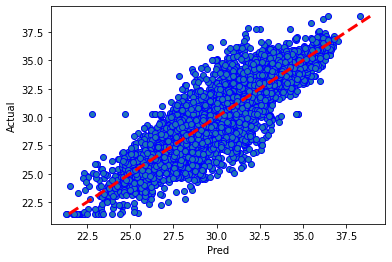

In [38]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y, edgecolors=(0, 0, 1))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=3)
ax.set_xlabel('Pred')
ax.set_ylabel('Actual')
plt.show()

In [39]:
#Untuk mencari akurasi score dari model kita
model.score(x, y)

0.7635574725925666